# Blood Glucose Control - EDA

**Name:** Daniel Hu



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [5]:
!pip install seaborn


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Define the list of CSV file paths
data_dir = ['../data/gluroo_500030.csv', '../data/gluroo_679372.csv']

# Load the datasets and add an 'id' column to distinguish between patients
df_list = []
for file_path in data_dir:
    df = pd.read_csv(file_path)
    df['id'] = file_path.split('_')[-1].split('.')[0]  # Extract ID from filename
    df_list.append(df)

# Concatenate the datasets into one DataFrame
df = pd.concat(df_list)

# Trim and reformat the 'date' column
df['interval'] = df['date'].apply(lambda x: x[27:29])  # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19])  # trimming the tail
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

# Add a column with date only (no time)
df['dateWOtime'] = df['date'].dt.date

# Create a new DataFrame for aggregations
newdf = pd.DataFrame()

# Aggregate by date and id (patients)
newdf['date'] = [list(list(i)[0])[0] for i in df.groupby(['dateWOtime', 'id'])['dateWOtime']]
newdf['id'] = [list(list(i)[0])[1] for i in df.groupby(['dateWOtime', 'id'])['dateWOtime']]

# Add total food consumed per day
newdf['food_consumed'] = [i for i in df.groupby(['dateWOtime', 'id'])['food_g'].sum()]

# Add total insulin per day
newdf['total_insulin'] = [i for i in df.groupby(['dateWOtime', 'id'])['dose_units'].sum()]

# Add average blood glucose level per day
newdf['avg_bgl'] = [i for i in df.groupby(['dateWOtime', 'id'])['bgl'].mean()]

# Add indicators for whether the patient had snacks or extra insulin on a day
had_snack = []
had_extra_insulin = []
for i in df.groupby(['dateWOtime', 'id'])['msg_type'].unique():
    had_snack.append('Yes' if 'INTERVENTION_SNACK' in list(i) else 'No')
    had_extra_insulin.append('Yes' if 'DOSE_INSULIN' in list(i) else 'No')

newdf['had_snack'] = had_snack
newdf['had_extra_insulin'] = had_extra_insulin

# Display the new DataFrame
display(newdf)

,date,id,food_consumed,total_insulin,avg_bgl,had_snack,had_extra_insulin
0,2024-05-01,500030,154.00,58.0,109.362126,Yes,Yes
1,2024-05-02,500030,211.00,74.0,120.066225,No,Yes
2,2024-05-03,500030,218.00,62.0,106.809836,Yes,Yes
3,2024-05-04,500030,109.00,35.0,124.877133,Yes,Yes
4,2024-05-05,500030,201.00,76.0,108.637584,Yes,Yes
...,...,...,...,...,...,...,...
170,2024-07-29,679372,128.54,14.0,128.456311,Yes,Yes
171,2024-07-30,500030,325.00,57.0,100.038585,Yes,Yes
172,2024-07-30,679372,30.00,10.0,126.646799,Yes,Yes
173,2024-07-31,500030,151.00,58.0,126.742574,Yes,Yes


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

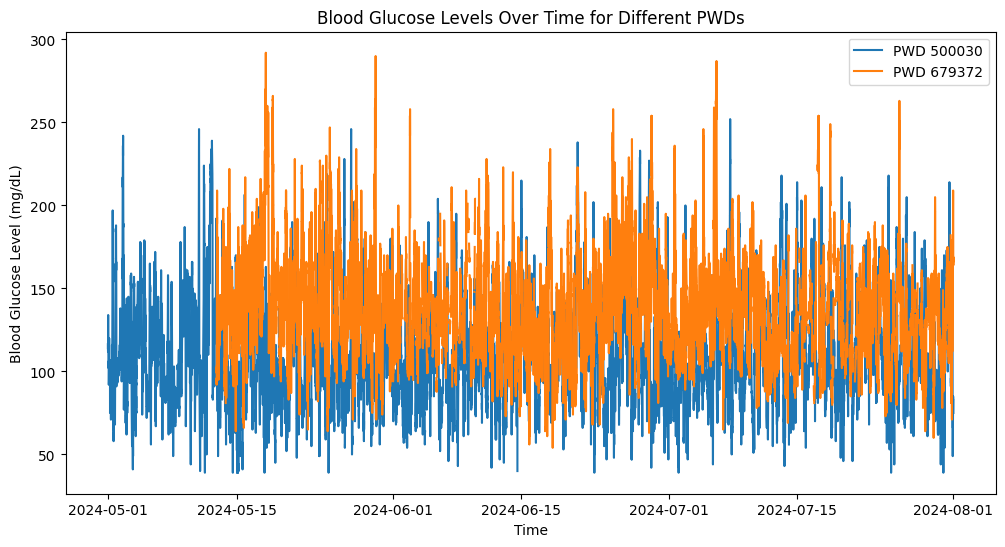

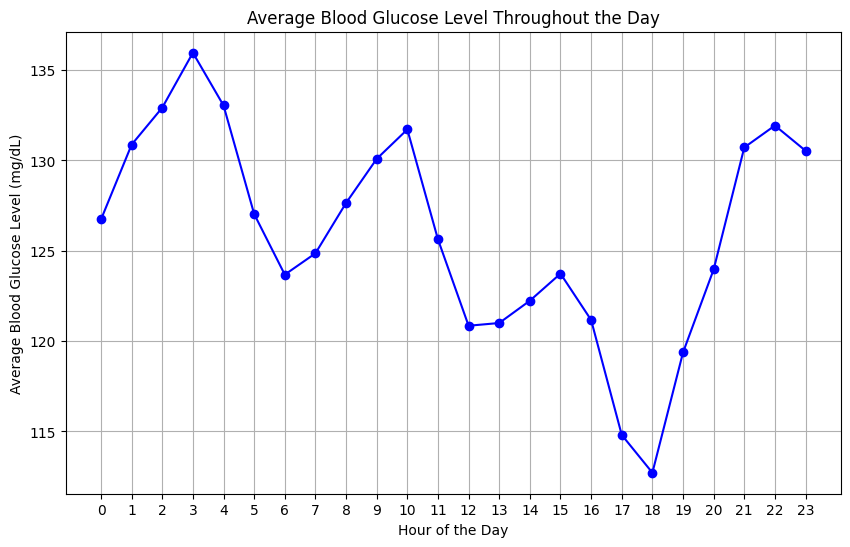

In [9]:
# Visualization 1: Blood Glucose Levels Over Time for Each PWD
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Loop through the 'id' column (patient ID)
for pwd_id in df['id'].unique():
    pwd_data = df[df['id'] == pwd_id]
    plt.plot(pwd_data['date'], pwd_data['bgl'], label=f'PWD {pwd_id}')

plt.xlabel('Time')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.title('Blood Glucose Levels Over Time for Different PWDs')
plt.legend()
plt.show()

# Visualization 2: Average Blood Glucose Level Throughout the Day
# Extract hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Group by hour to find the average blood glucose level
hourly_glucose = df.groupby('hour')['bgl'].mean()

# Plot the average blood glucose level by hour
plt.figure(figsize=(10, 6))
hourly_glucose.plot(kind='line', marker='o', color='b')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Blood Glucose Level (mg/dL)')
plt.title('Average Blood Glucose Level Throughout the Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. **How does glucose variability (as seen in the first visualization) correlate with long-term complications in diabetes management?** Could higher variability indicate a need for continuous glucose monitoring or more personalized treatment?

2. **How can hourly trends (as shown in the second visualization) be used to optimize insulin dosage or meal planning?** Are there strategies to smooth out glucose peaks and reduce extreme fluctuations at specific times of the day?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`